\begin{center}
Gabe Morris
\end{center}

In [1]:
# Notebook Preamble
%config InteractiveShell.ast_node_interactivity='all'
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

plt.style.use('maroon_ipynb.mplstyle')

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 6233 & Homework 4 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 1
## Given

\begin{center}
\includegraphics{images/fig1}
\end{center}

For a rectangular element, the displacements at four nodes are given by

$$u_1=0$$
$$v_1=0$$
$$u_2=-0.5$$
$$v_2=-0.5$$
$$u_3=0.75$$
$$v_3=1.25$$
$$u_4=0.5$$
$$v_4=1$$

## Find
a. Calculate the displacement $(u,v)$ at point $(x,y)=(0.7,1.3)$.
b. Calculate the strain $\epsilon_{xx}$ at point $(x,y)=(0.7,1.3)$

## Solution
From Fig. 3.4-1 in the text, $a=1.5$ and $b=1$. These are the center to edge dimensions of the rectangle and are used in the shape functions/strain displacement matrix.

The analysis of the bilinear quadrilateral depends on the origin being at the center of the rectangle. Therefore, the point $(0.7,1.3)$ relative to the origin at the center is $(0.7,1.3)-(a,b)=(-0.8,0.3)$.

### Part A
The displacements $u,v$ can be defined as the dot product between the shape function and the displacement vectors

$$u(x,y)=\vec{N}\cdot\vec{u}$$
$$v(x,y)=\vec{N}\cdot\vec{v}$$

where the shape function in the vector form is,

$$N=\begin{bmatrix}
\frac{(a - x) (b - y)}{4 a b} \\
\frac{(a + x) (b - y)}{4 a b} \\
\frac{(a + x) (b + y)}{4 a b} \\
\frac{(a - x) (b + y)}{4 a b}
\end{bmatrix}$$

and $\vec{u}$ and $\vec{v}$ are $\langle u_1,u_2,u_3,u_4\rangle$ and $\langle v_1,v_2,v_3,v_4\rangle$.

In [2]:
# Define known parameters
# The underscore denotes a numerical value, while no underscore denotes a symbol.
a_, b_ = 1.5, 1
x_, y_ = -0.8, 0.3
u_, v_ = [0, -0.5, 0.75, 0.5], [0, -0.5, 1.25, 1]
d_ = np.array(list(zip(u_, v_))).flatten()

# Define symbols
a, b, x, y = sp.symbols('a b x y')
u_vec, v_vec = sp.Matrix(u_), sp.Matrix(v_)
d_vec = sp.Matrix(d_)

# Shape function
N = 1/(4*a*b)*sp.Matrix([(a - x)*(b - y), (a + x)*(b - y), (a + x)*(b + y), (a - x)*(b + y)])

sub = [(a, a_), (b, b_), (x, x_), (y, y_)]
N_ = N.subs(sub)

u = sp.DotProduct(N, u_vec)
v = sp.DotProduct(N, v_vec)
sp.Eq(u, N_.dot(u_vec), evaluate=False)
sp.Eq(v, N_.dot(v_vec), evaluate=False)

Eq(DotProduct(Matrix([
[(a - x)*(b - y)/(4*a*b)],
[(a + x)*(b - y)/(4*a*b)],
[(a + x)*(b + y)/(4*a*b)],
[(a - x)*(b + y)/(4*a*b)]]), Matrix([
[   0],
[-0.5],
[0.75],
[ 0.5]])), 0.322083333333333)

Eq(DotProduct(Matrix([
[(a - x)*(b - y)/(4*a*b)],
[(a + x)*(b - y)/(4*a*b)],
[(a + x)*(b + y)/(4*a*b)],
[(a - x)*(b + y)/(4*a*b)]]), Matrix([
[   0],
[-0.5],
[1.25],
[   1]])), 0.647083333333333)

Thus, the displacements $u,v$ at $(-0.8,0.3)$ are $u=0.322$ and $v=0.647$.

### Part B
The strain displacement matrix is

In [3]:
# Getting B
B = 1/(4*a*b)*sp.Matrix([
    [-(b - y), 0, b - y, 0, b + y, 0, -(b + y), 0],
    [0, -(a - x), 0, -(a + x), 0, (a + x), 0, (a - x)],
    [-(a - x), -(b - y), -(a + x), b - y, a + x, b + y, a - x, -(b + y)]
])
sp.Eq(sp.Symbol('B'), B, evaluate=False)

Eq(B, Matrix([
[(-b + y)/(4*a*b),                0,  (b - y)/(4*a*b),                0, (b + y)/(4*a*b),               0, (-b - y)/(4*a*b),                0],
[               0, (-a + x)/(4*a*b),                0, (-a - x)/(4*a*b),               0, (a + x)/(4*a*b),                0,  (a - x)/(4*a*b)],
[(-a + x)/(4*a*b), (-b + y)/(4*a*b), (-a - x)/(4*a*b),  (b - y)/(4*a*b), (a + x)/(4*a*b), (b + y)/(4*a*b),  (a - x)/(4*a*b), (-b - y)/(4*a*b)]]))

The strain may be calculated using $\epsilon=Bd$.

In [4]:
Bd = sp.MatMul(B, d_vec)
Bd_doit = Bd.doit().subs(sub)
sp.Eq(Bd, Bd_doit, evaluate=False)

Eq(Matrix([
[(-b + y)/(4*a*b),                0,  (b - y)/(4*a*b),                0, (b + y)/(4*a*b),               0, (-b - y)/(4*a*b),                0],
[               0, (-a + x)/(4*a*b),                0, (-a - x)/(4*a*b),               0, (a + x)/(4*a*b),                0,  (a - x)/(4*a*b)],
[(-a + x)/(4*a*b), (-b + y)/(4*a*b), (-a - x)/(4*a*b),  (b - y)/(4*a*b), (a + x)/(4*a*b), (b + y)/(4*a*b),  (a - x)/(4*a*b), (-b - y)/(4*a*b)]])*Matrix([
[   0],
[   0],
[-0.5],
[-0.5],
[0.75],
[1.25],
[ 0.5],
[ 1.0]]), Matrix([
[-0.00416666666666666],
[              0.5875],
[   0.333333333333333]]))

Thus, $\epsilon_{xx}=-0.00417$.

\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 6233 & Homework 4 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 2
## Given

\begin{center}
\includegraphics{images/fig2}
\end{center}

A steel paddle wheel with a thickness of 6.0 inches is placed in a scenario in which the paddles are loaded normally in a counterclockwise pattern at a total force of 130 lbf on the bottommost paddle. The dimensions of the paddle wheel are given in the schematic. The properties for steel are ($E=30\cdot10^6\,psi$; $\nu=0.3$).

## Find
Perform a mesh convergence analysis on the paddle wheel using elements of your choosing.

- Include a minimum of 4 mesh densities.
- Use the probe tool in Abaqus to determine the stress at the same location in each simulation rather than taking the maximum stress.
- Consider partitioning the geometry, so the mesh puts a node in the same location each time.

## Solution
### Boundary and Loading Conditions

\begin{center}
\includegraphics{images/fig3}
\end{center}

The above figure shows that there is 130 lbf acting on the vertical red face. The area of this surface is $43.0635\,in^2$, which means that a magnitude of $\frac{130\,lbf}{43.0635\,in^2}=3.02\,psi$ was used for the surface traction. The boundary condition is the encastre option on the inner face of the wheel, which fixes all the degrees of freedom for the nodes on that surface.

### Partition and Mesh

\begin{center}
\includegraphics{images/fig4}
\end{center}

The line above contains a partition about the midpoint of the edge shown. The same element attached to the midpoint node will be considered for this analysis.

\begin{center}
\includegraphics{images/fig5}
\end{center}

The mesh element chosen was the Tet C3D10 element type. This element was chosen due to the many circular surfaces of the geometry (mesh size of 3 inches shown above).

### Results

\begin{center}
\includegraphics{images/fig6}
\end{center}

Above shows the results for the mesh size of 3 inches. The study above was repeated for different mesh sizes shown in the table below.

| Mesh Size (in) | Total Elements | Stress Value (psi) |
|----------------|----------------|--------------------|
| 3              | 7,400          | 74.110             |
| 2              | 10,584         | 78.411             |
| 1              | 38,987         | 81.765             |
| 0.75           | 86,671         | 83.736             |

In [5]:
%config InteractiveShell.ast_node_interactivity='last_expr'

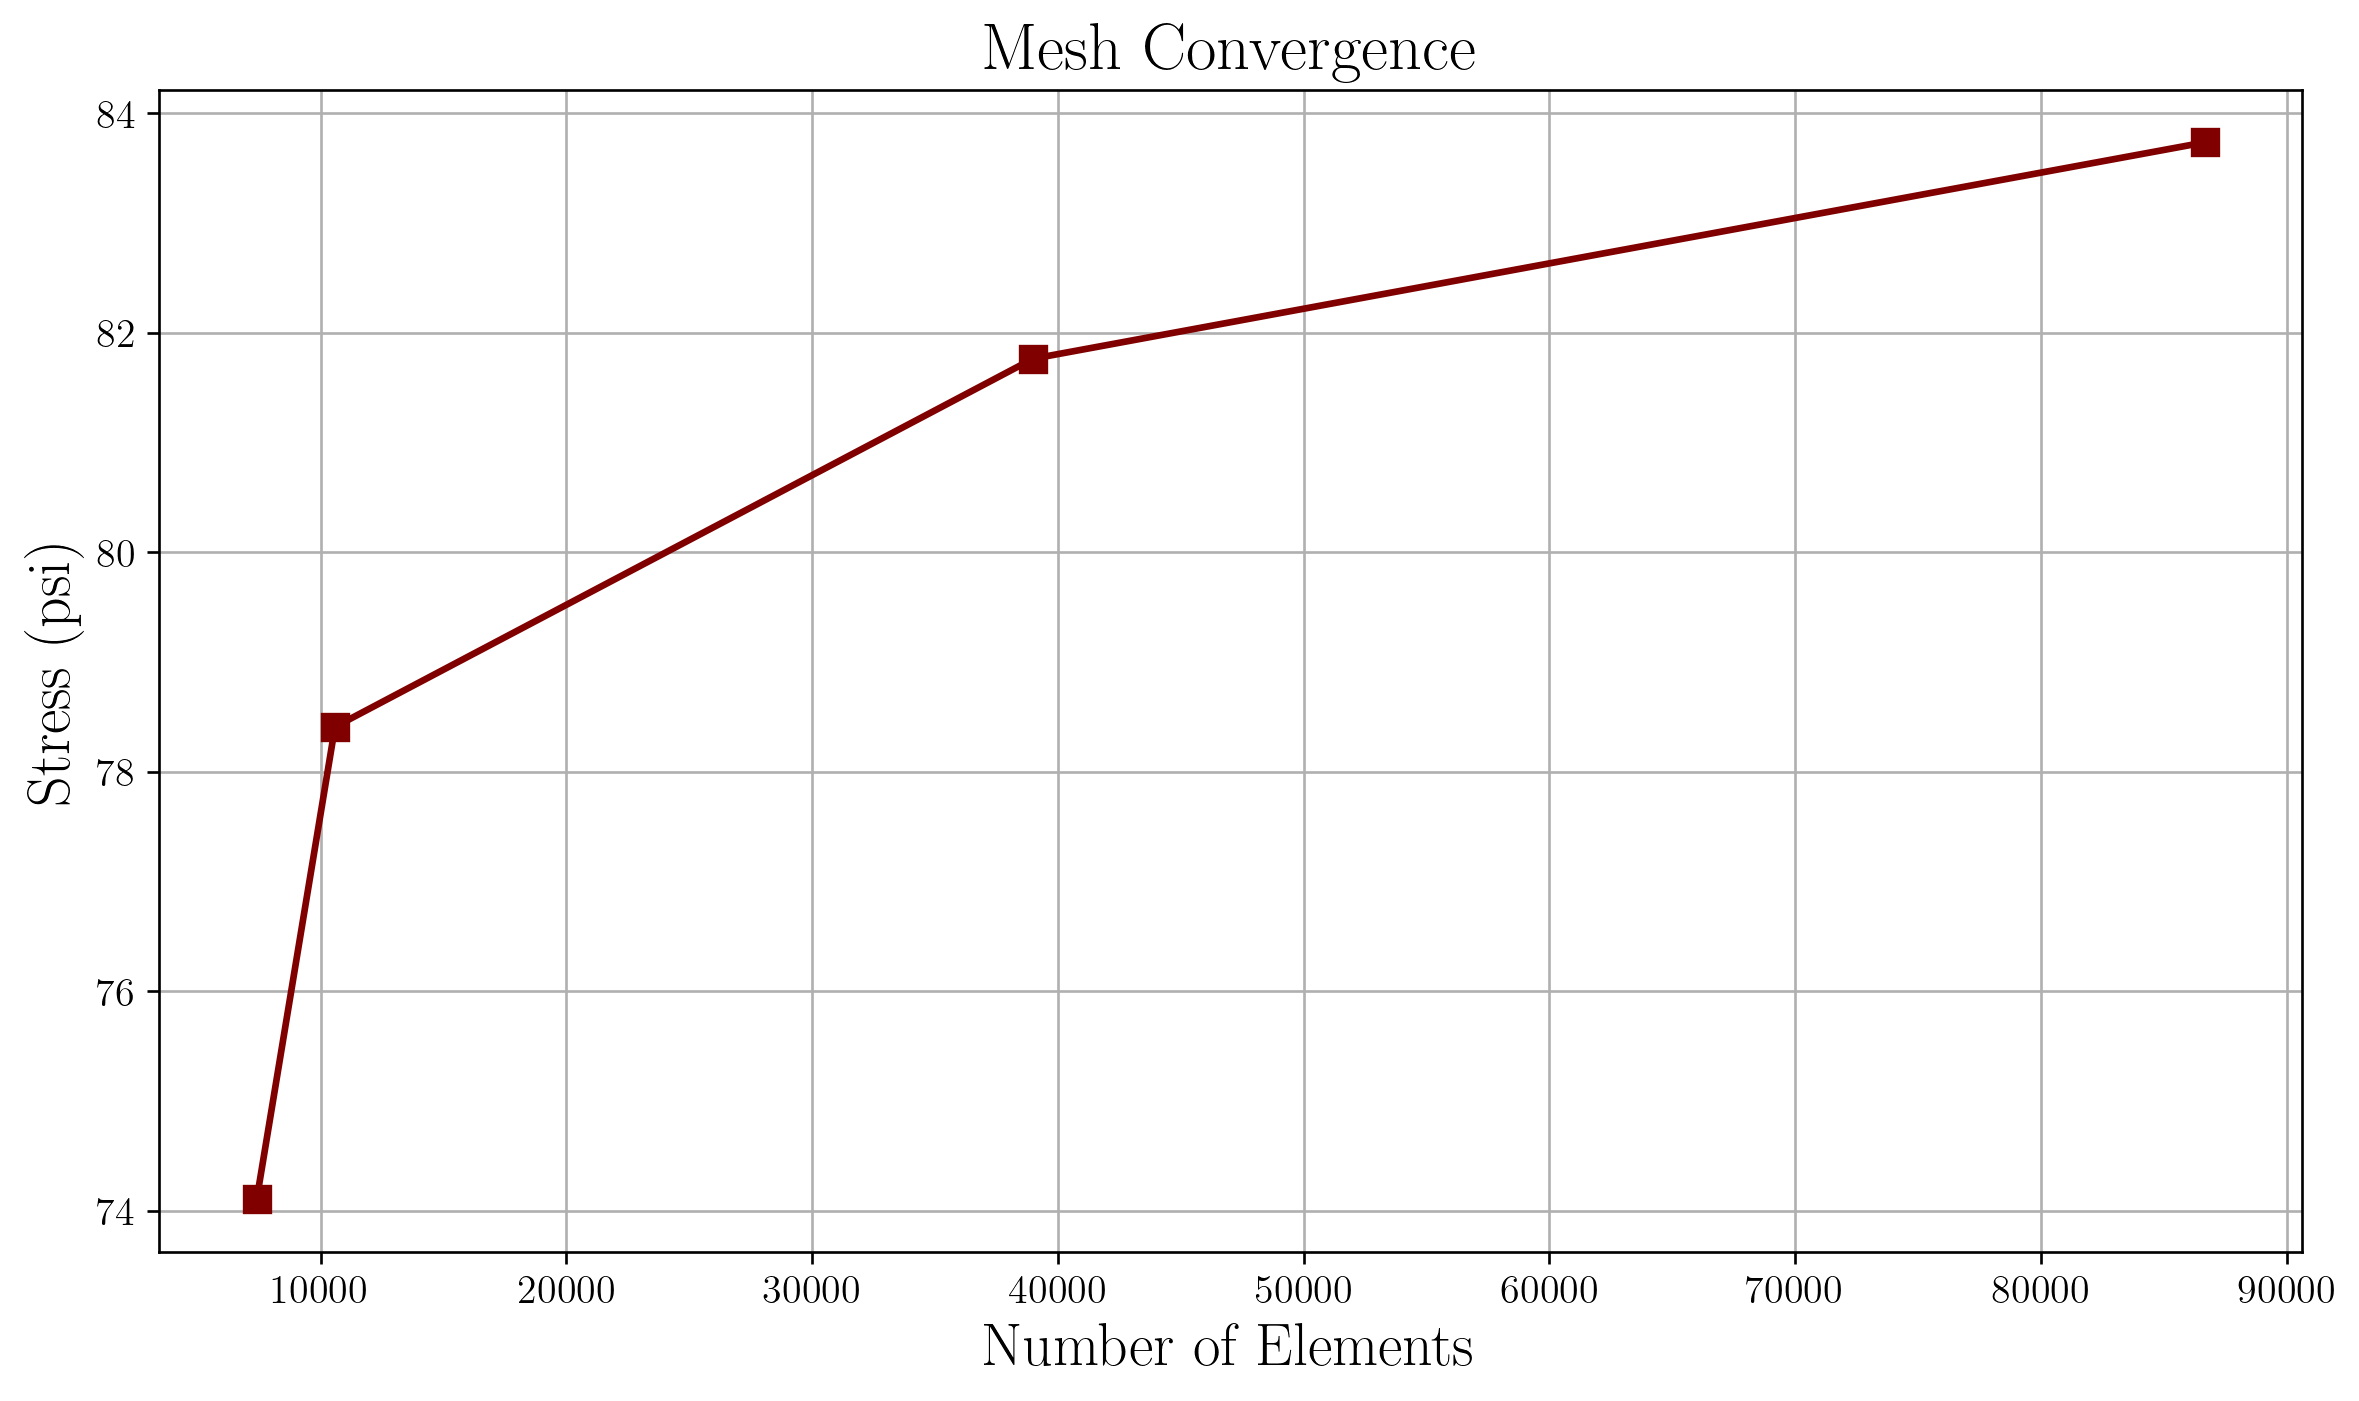

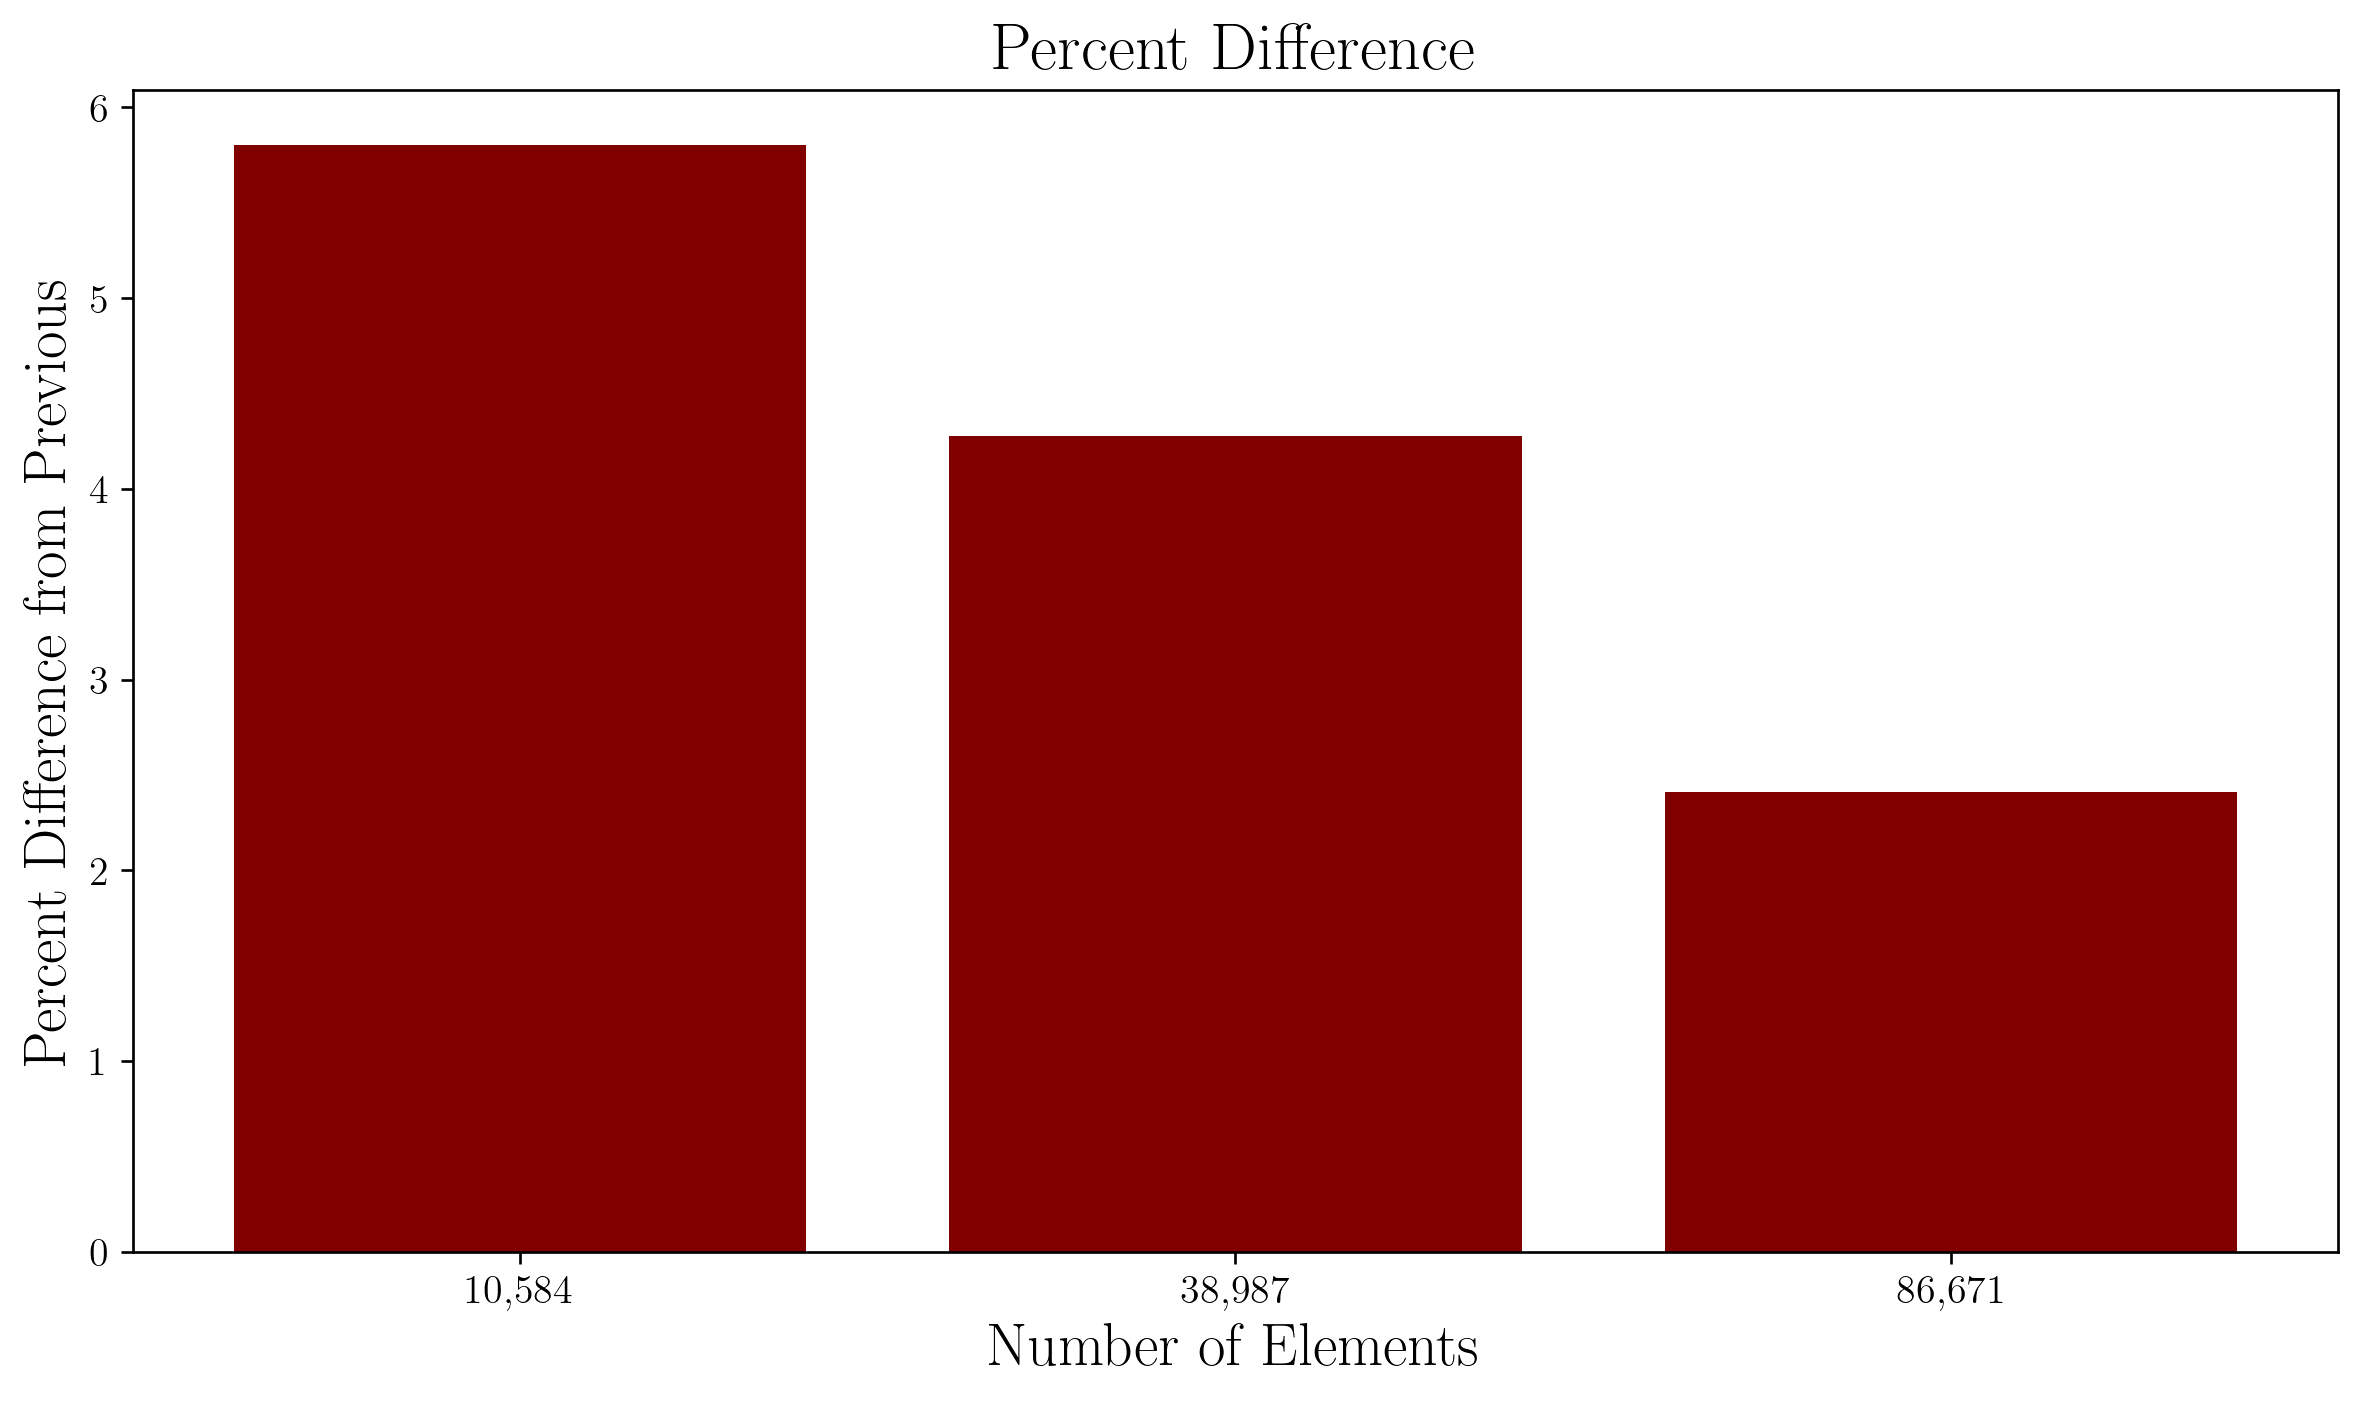

In [6]:
# Getting a plot
elements = np.array([7400, 10_584, 38_987, 86_671])
stresses = np.array([74.11, 78.411, 81.765, 83.736])

percents = [(stresses[i] - stresses[i - 1])/stresses[i - 1]*100 for i in range(1, stresses.size)]

# Underscores used to supress unwanted output
plt.plot(elements, stresses, marker='s')
plt.xlabel('Number of Elements')
plt.ylabel('Stress (psi)')
plt.title('Mesh Convergence')
plt.show()

# Creating bar chart
plt.bar([f'{element:,}' for element in elements[1:]], percents)
plt.xlabel('Number of Elements')
plt.ylabel('Percent Difference from Previous')
plt.title('Percent Difference')
plt.grid(visible=False)
plt.show()

The results show that the increase in the number of elements will converge to the exact solution (around 84 psi). The bar chart shows the percent difference from the previous iteration and shows that the percent difference decreases with each iteration, which indicates that the derivative of the stress with respect to the number of elements is converging at zero.

\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 6233 & Homework 4 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3
## Given

\begin{center}
\includegraphics{images/fig8}
\end{center}

Given the steel machine element, an applied load of $F=7,000\,lbf$ and a thickness of 0.4 inches is applied to the element shown above.

## Find
a. Solve for the stress distribution along section A-A using a plane stress finite element analysis.
b. Compare the FEA results with a stress distribution calculated using mechanics of materials principles.

## Solution
### Part A

\begin{center}
\includegraphics{images/fig9}
\end{center}

I am going to assume that this is aluminum with $E=10\,ksi$ and $\nu=0.35$. The plane stress option was chosen as shown above. A partition was created so that the force and boundary conditions are extended to the split faces shown below.

\begin{center}
\includegraphics{images/fig10}
\end{center}

The Hex C3D8R element type was used due to the limitation of the number of nodes and because there are not many curved surfaces in the geometry. An approximate mesh size of 0.05 inches was used.

#### FEA Results

\begin{center}
\includegraphics{images/fig11}
\end{center}

The stress values at the bottom of the plate, midway between the bottom slotted surface and the bottom of the plate, surfaces of the slotted hole, and top of the plate were evaluated in the table below. If the y value is starting from the bottom of the plate:

| y (in) | Stress (psi) |
|--------|--------------|
| 0      | 3174         |
| 1.5    | 5200         |
| 3      | 7000         |
| 3.5    | 6162         |
| 4      | 4292         |

#### Mechanics of Materials
The